In [1]:
%load_ext autoreload
%autoreload 2

sklearn version: 1.4.2
Ground truth labels provided. Computing ground truth-based clustering metrics along with non-ground truth based metrics.
Search space:
[[KMeans(),
  {'algorithm': ['lloyd', 'elkan'],
   'init': ['k-means++', 'random'],
   'max_iter': [50, 100, 200],
   'n_clusters': range(3, 21),
   'tol': [0.01, 0.0001, 1e-06, 1e-08]}],
 [AgglomerativeClustering(),
  {'linkage': ['ward', 'complete', 'average', 'single'],
   'metric': ['euclidean', 'manhattan', 'cosine', 'l1', 'l2'],
   'n_clusters': range(3, 21)}],
 [HDBSCAN(),
  {'allow_single_cluster': [True, False],
   'cluster_selection_method': ['eom', 'leaf'],
   'min_cluster_size': range(1, 21)}],
 [MeanShift(),
  {'bin_seeding': [True, False],
   'max_iter': [100, 300, 500],
   'min_bin_freq': [1, 5, 10]}]]



  0%|          | 0/4 [00:00<?, ?it/s]

Searching for best hyperparameters for KMeans...
Available parameters: ['algorithm', 'copy_x', 'init', 'max_iter', 'n_clusters', 'n_init', 'random_state', 'tol', 'verbose']
But only searching for parameters: ['n_clusters', 'algorithm', 'init', 'max_iter', 'tol']


Plotting silhouette analysis...
Plotting first 2 features of the data...
Saving silhouette plot for k=5 at results/models/KMeans/silhouette_plots/5_silhouette_plot.png


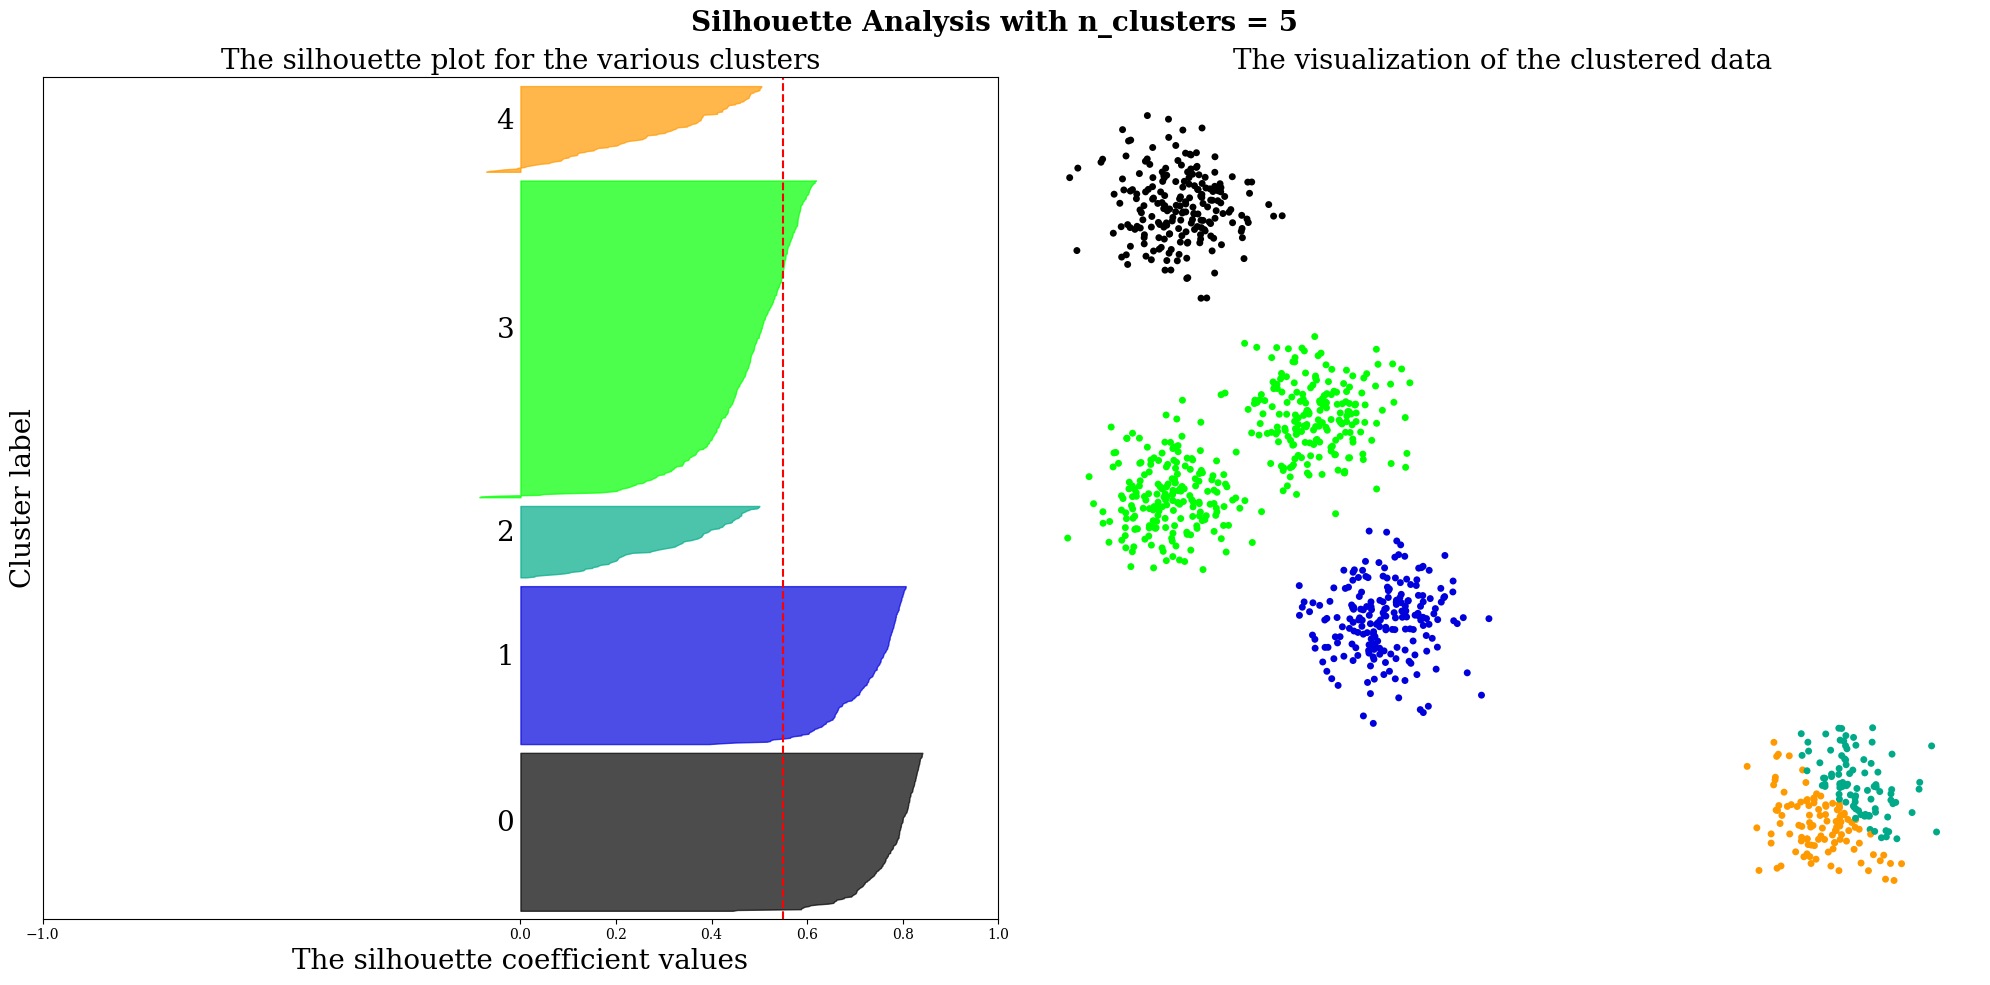

 25%|██▌       | 1/4 [00:18<00:54, 18.16s/it]


Searching for best hyperparameters for AgglomerativeClustering...
Available parameters: ['compute_distances', 'compute_full_tree', 'connectivity', 'distance_threshold', 'linkage', 'memory', 'metric', 'n_clusters']
But only searching for parameters: ['n_clusters', 'metric', 'linkage']


Plotting silhouette analysis...
Plotting first 2 features of the data...
Saving silhouette plot for k=5 at results/models/AgglomerativeClustering/silhouette_plots/5_silhouette_plot.png


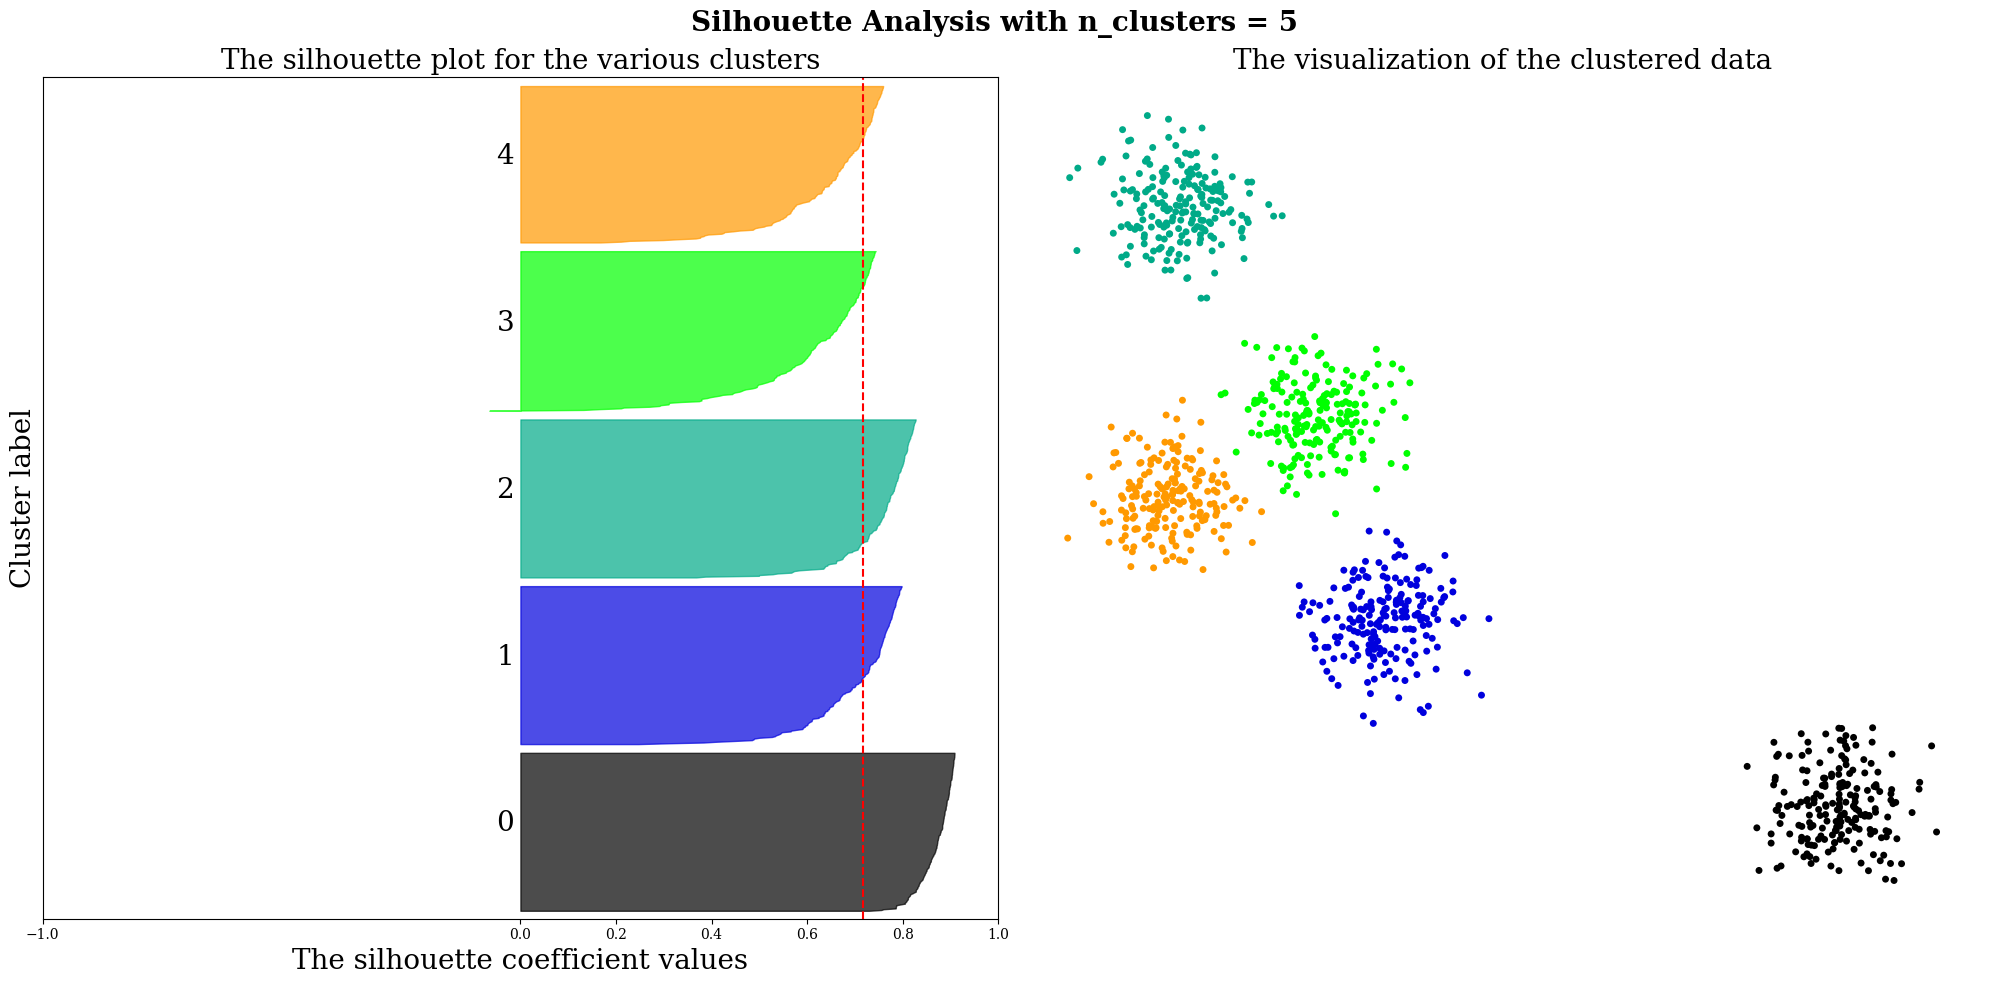

 50%|█████     | 2/4 [00:26<00:24, 12.47s/it]


Searching for best hyperparameters for HDBSCAN...
Available parameters: ['algorithm', 'allow_single_cluster', 'alpha', 'cluster_selection_epsilon', 'cluster_selection_method', 'copy', 'leaf_size', 'max_cluster_size', 'metric', 'metric_params', 'min_cluster_size', 'min_samples', 'n_jobs', 'store_centers']
But only searching for parameters: ['min_cluster_size', 'cluster_selection_method', 'allow_single_cluster']


Plotting silhouette analysis...
Plotting first 2 features of the data...
Saving silhouette plot for k=6 at results/models/HDBSCAN/silhouette_plots/6_silhouette_plot.png


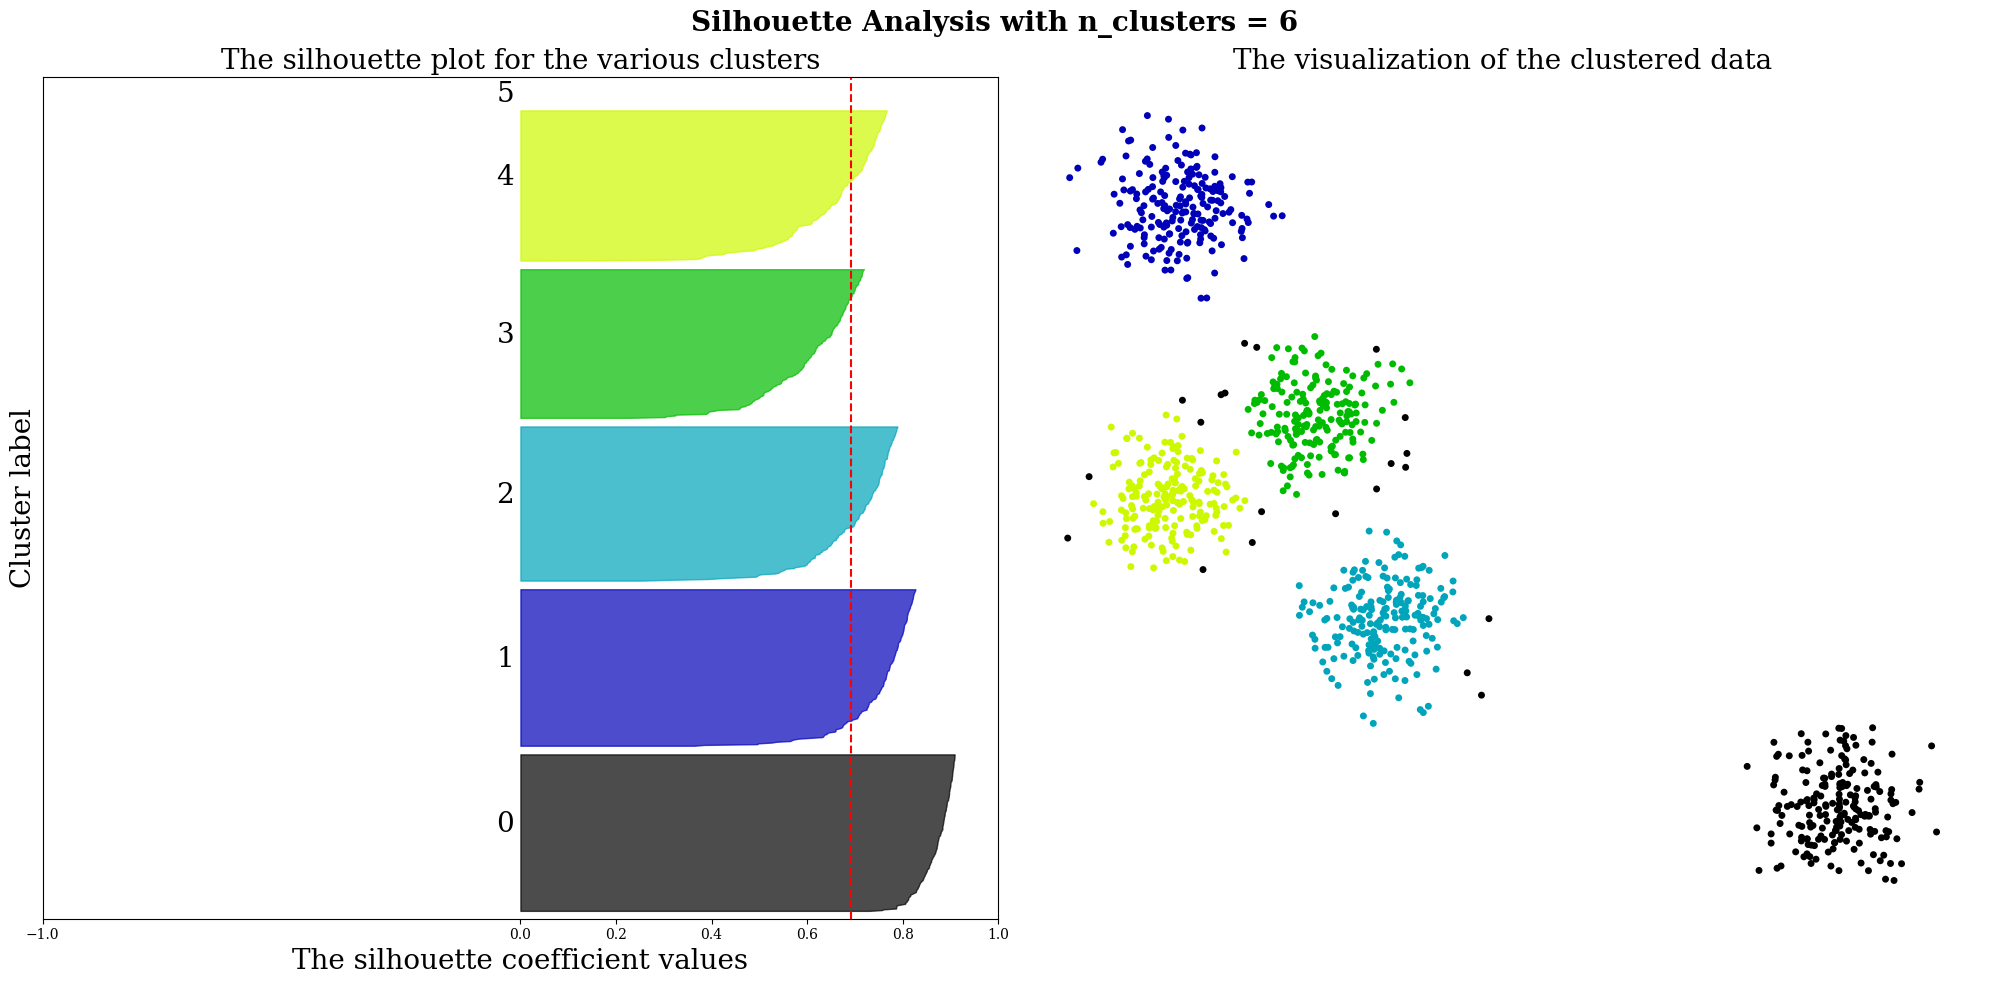

 75%|███████▌  | 3/4 [00:30<00:08,  8.42s/it]


Searching for best hyperparameters for MeanShift...
Available parameters: ['bandwidth', 'bin_seeding', 'cluster_all', 'max_iter', 'min_bin_freq', 'n_jobs', 'seeds']
But only searching for parameters: ['max_iter', 'bin_seeding', 'min_bin_freq']


Plotting silhouette analysis...
Plotting first 2 features of the data...
Saving silhouette plot for k=2 at results/models/MeanShift/silhouette_plots/2_silhouette_plot.png


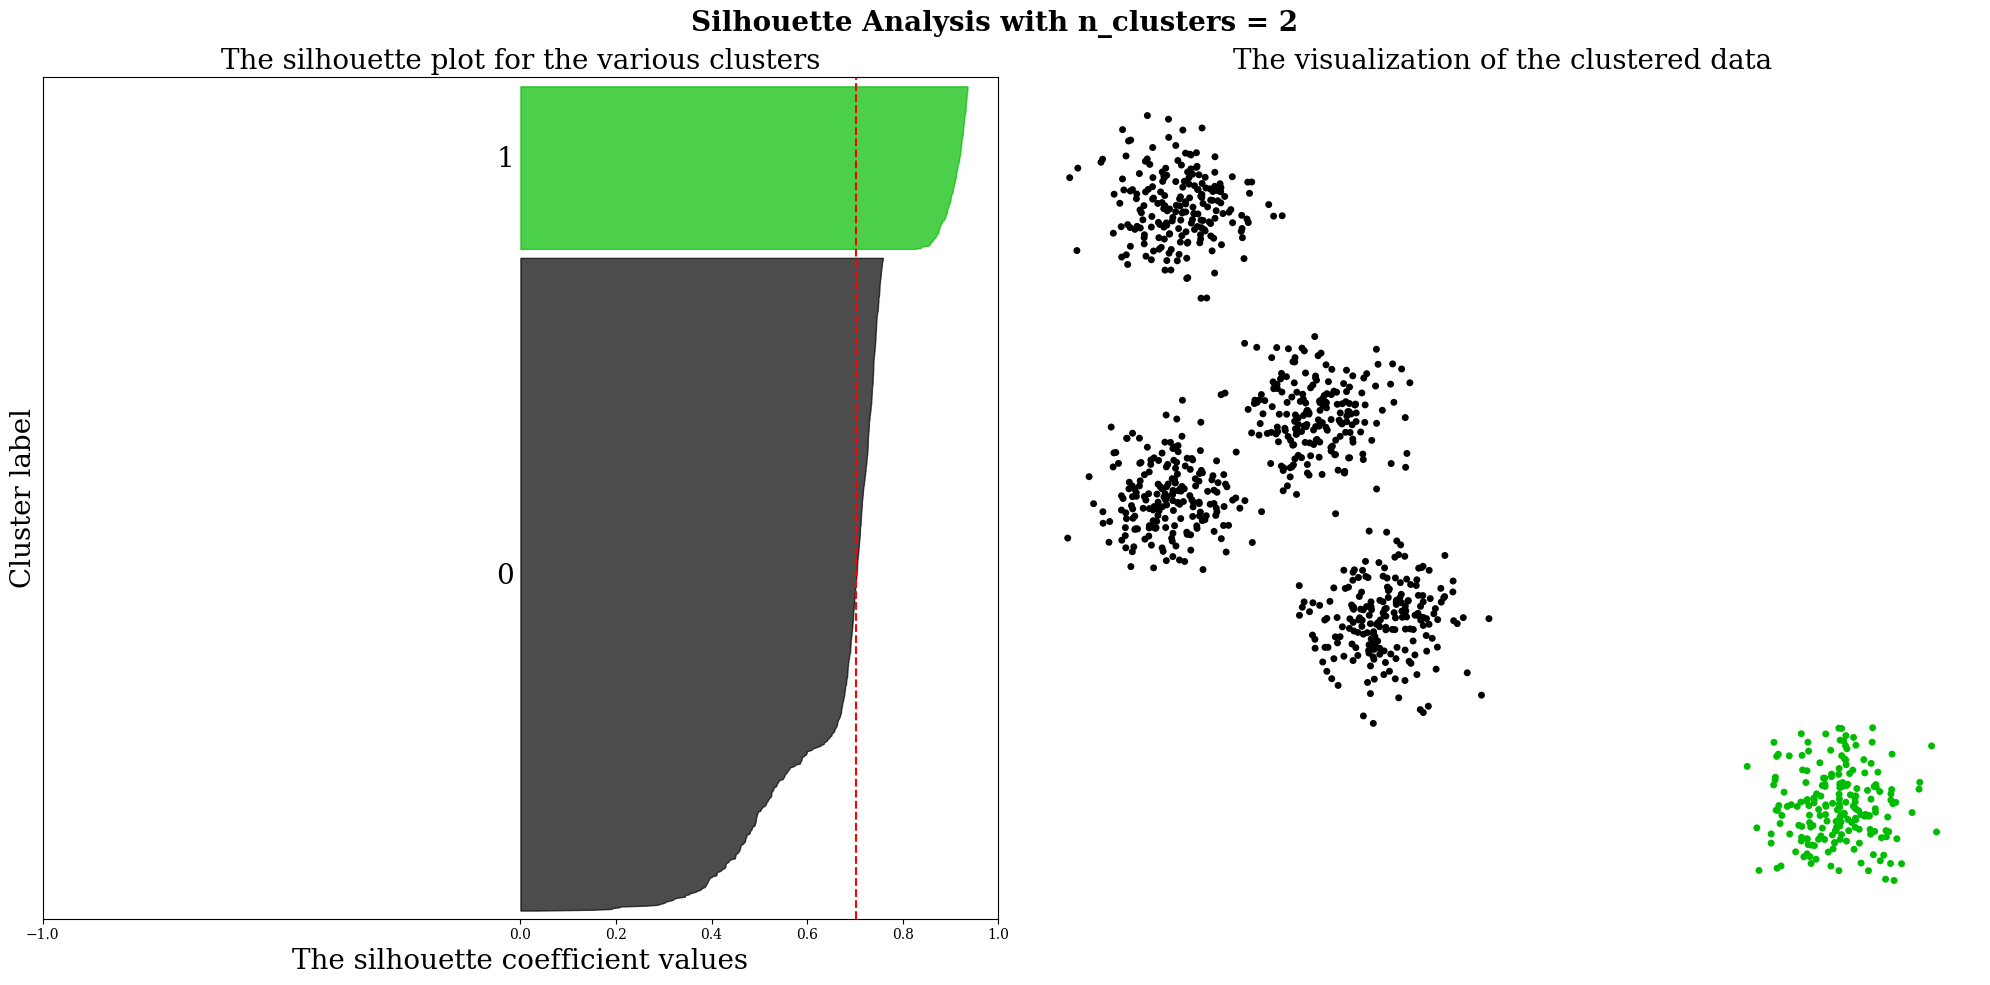

100%|██████████| 4/4 [00:51<00:00, 12.88s/it]


Best model:  AgglomerativeClustering
Best model params:  {'compute_distances': False, 'compute_full_tree': 'auto', 'connectivity': None, 'distance_threshold': None, 'linkage': 'complete', 'memory': None, 'metric': 'euclidean', 'n_clusters': 5}


In [4]:
import os
import numpy as np
from sklearn.datasets import make_blobs, load_iris, load_digits
from eval_clustering import eval_clustering

## For testing purposes
rng = np.random.RandomState(0)
n_samples=1000

### Synthetic data: Without outliers
X, y = make_blobs(n_samples=n_samples, centers=5, n_features=2, cluster_std=0.60, random_state=rng)

# ### Synthetic data: With outliers
# centers = [[1, 1], [-1, -1], [1, -1]]
# #### Generate some blobs
# X, y = make_blobs(
#     n_samples=n_samples, centers=centers, cluster_std=0.4, random_state=rng
# )
# #### Change the first 1% entries to outliers
# for f in range(int(n_samples / 100)):
#     X[f] = [10, 3] + rng.normal(size=2) * 0.1
# #### Shuffle the data so that we don't know where the outlier is.
# X = shuffle(X, random_state=rng)

### Real benchmark
# data = load_iris()
# X, y = data.data, data.target

save_dir = "results"
os.makedirs(save_dir, exist_ok=True)

best_model, grid_search_results = eval_clustering(
                                       X=X,                                               # dataset to cluster
                                       gt_labels=y,                                       # ground-truth labels; often these aren't available so don't pass this argument
                                       num_runs=10,                                       # number of times to fit a model
                                       best_model_metric="FMI",                           # metric to use to choose the best model
                                       make_silhoutte_plots=True, embed_data_in_2d=False, # whether to make silhouette plots
                                       show=True,                                         # whether to display the plots; this is used in a notebook
                                       save=True, save_dir="results"                      # whether to save the plots
                                    )
print("Best model: ", best_model.__class__.__name__)
print("Best model params: ", best_model.get_params())

In [30]:
grid_search_results.keys()

dict_keys(['KMeans', 'AgglomerativeClustering', 'HDBSCAN', 'MeanShift'])

In [15]:
grid_search_results['KMeans']

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_init,param_max_iter,param_n_clusters,param_tol,params,...,split3_test_FMI,split4_test_FMI,split5_test_FMI,split6_test_FMI,split7_test_FMI,split8_test_FMI,split9_test_FMI,mean_test_FMI,std_test_FMI,rank_test_FMI
0,0.106520,0.047121,0.029840,0.004458,lloyd,k-means++,50,3,0.01,"{'algorithm': 'lloyd', 'init': 'k-means++', 'm...",...,0.670396,0.671817,0.671817,0.671817,0.671102,0.671817,0.671817,0.670542,0.002465,456
1,0.096366,0.018198,0.031149,0.006071,lloyd,k-means++,50,3,0.0001,"{'algorithm': 'lloyd', 'init': 'k-means++', 'm...",...,0.659199,0.654424,0.671817,0.671817,0.671817,0.671817,0.671817,0.665897,0.007331,476
2,0.109757,0.041018,0.031112,0.004163,lloyd,k-means++,50,3,0.000001,"{'algorithm': 'lloyd', 'init': 'k-means++', 'm...",...,0.661297,0.671817,0.661297,0.661297,0.661297,0.671817,0.671817,0.666557,0.005260,474
3,0.032221,0.061488,0.024750,0.006280,lloyd,k-means++,50,3,0.0,"{'algorithm': 'lloyd', 'init': 'k-means++', 'm...",...,0.671817,0.671817,0.671817,0.671817,0.671817,0.661297,0.671817,0.670765,0.003156,450
4,0.001742,0.000259,0.029653,0.003599,lloyd,k-means++,50,4,0.01,"{'algorithm': 'lloyd', 'init': 'k-means++', 'm...",...,0.844548,0.792012,0.844548,0.842383,0.844548,0.842383,0.842383,0.838212,0.015434,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0.051334,0.011013,0.078674,0.005922,elkan,random,200,19,0.0,"{'algorithm': 'elkan', 'init': 'random', 'max_...",...,0.537645,0.529630,0.529935,0.529859,0.527327,0.536966,0.524407,0.528654,0.005093,800
860,0.016349,0.001246,0.043610,0.000717,elkan,random,200,20,0.01,"{'algorithm': 'elkan', 'init': 'random', 'max_...",...,0.527324,0.517589,0.520310,0.517127,0.515830,0.517694,0.512985,0.520509,0.006467,823
861,0.040568,0.004468,0.068159,0.002954,elkan,random,200,20,0.0001,"{'algorithm': 'elkan', 'init': 'random', 'max_...",...,0.512115,0.516601,0.517948,0.528791,0.507063,0.522078,0.519293,0.517643,0.005967,839
862,0.049975,0.003092,0.070690,0.007738,elkan,random,200,20,0.000001,"{'algorithm': 'elkan', 'init': 'random', 'max_...",...,0.511373,0.512657,0.524383,0.516846,0.519991,0.514917,0.520048,0.515930,0.004361,850
